In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns = cancer['feature_names'])

# df.head()

list(df)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

Kita Lakukan Normalisasi karena satuan tiap kolom berbeda-beda


In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scalar.fit(df)
scaled_data = scalar.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
scaled_data.T.shape

(30, 569)

In [ ]:
cov_matrix = np.cov(scaled_data.T)
cov_matrix[0:5,:]
cov_matrix.shape

(30, 30)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues = list(eigenvalues)
eigenvalues

[13.304990794374568,
 5.701374603726145,
 2.8229101550062277,
 1.9841275177301976,
 1.6516332423301217,
 1.2094822398029723,
 0.676408881700906,
 0.4774562546895078,
 0.4176287821078165,
 0.3513108748817334,
 0.29443315349116467,
 0.26162116136612107,
 0.24178242132831376,
 0.15728614921759318,
 0.09430069560105564,
 0.08000340447737664,
 0.059503613530432035,
 0.05271142221014815,
 0.049564700212981476,
 0.00013327905666390185,
 0.0007501214127191863,
 0.0015921360011976007,
 0.006912612579184306,
 0.00819203711760687,
 0.01550852713441895,
 0.0180867939843053,
 0.02438369135459101,
 0.027487711338904264,
 0.03121426055306656,
 0.03002566309042843]

In [ ]:
eigenvectors.shape

(30, 30)

In [ ]:
list(eigenvalues/sum(eigenvalues)*100)

[44.27202560752637,
 18.971182044033092,
 9.39316325743138,
 6.602134915470133,
 5.495768492346272,
 4.024522039883351,
 2.25073371298251,
 1.5887238000213257,
 1.3896493745591079,
 1.1689781894131488,
 0.9797189875980168,
 0.8705379007378835,
 0.804524987196732,
 0.5233657454926355,
 0.31378321676273924,
 0.2662093365152309,
 0.19799679253242755,
 0.175395945022637,
 0.16492530592251592,
 0.0004434827427363574,
 0.0024960103246895,
 0.0052977929038092375,
 0.02300154625059569,
 0.02725879954774868,
 0.051604237916519975,
 0.060183356667166996,
 0.08113612588991029,
 0.09146467510543418,
 0.10386467483387112,
 0.09990964637002543]

Plot the point

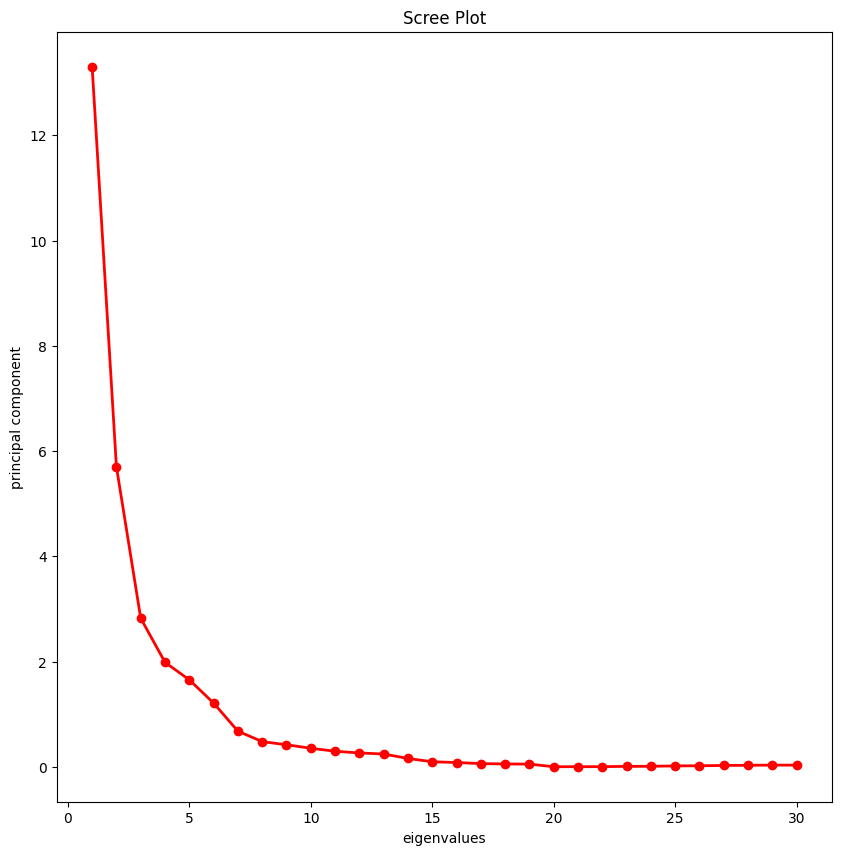

In [ ]:
num_vars = 30
sing_vals = np.arange(num_vars)+1
plt.figure(figsize=(10,10))
plt.plot(sing_vals,eigenvalues,'ro-',linewidth=2)
plt.title('Scree Plot')
plt.ylabel('principal component')
plt.xlabel('eigenvalues')
plt.show()

In [ ]:
#Import PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

x_pca.shape

(569, 6)

In [ ]:
variance = pca.explained_variance_ratio_
print(sum(variance))

pca.components_

0.8875879635663841


array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060884e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653630e-02, -3.47675002e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

In [ ]:
principalDF = pd.DataFrame(data = pca.components_.T
                           ,columns = ['1','2','3','4','5','6'])
principalDF

,1,2,3,4,5,6
0,0.218902,-0.233857,-0.008531,0.041409,0.037786,0.018741
1,0.103725,-0.059706,0.064550,-0.603050,-0.049469,-0.032179
2,0.227537,-0.215181,-0.009314,0.041983,0.037375,0.017309
3,0.220995,-0.231077,0.028700,0.053434,0.010331,-0.001888
4,0.142590,0.186113,-0.104292,0.159383,-0.365089,-0.286374
5,0.239285,0.151892,-0.074092,0.031795,0.011704,-0.014131
6,0.258400,0.060165,0.002734,0.019123,0.086375,-0.009344
7,0.260854,-0.034768,-0.025564,0.065336,-0.043861,-0.052050
8,0.138167,0.190349,-0.040240,0.067125,-0.305941,0.356459
9,0.064363,0.366575,-0.022574,0.048587,-0.044424,-0.119431
